In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000019612"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000019612
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,CHEMICAL FINANCIAL CORP
Ticker,CHFC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,21.0,1.998762e+01,8.613704e-01,1.845000e+01,1.932000e+01,1.998000e+01,2.074000e+01,21.6
interest income,65.0,7.415414e+07,4.617539e+07,4.485700e+07,5.150800e+07,5.364500e+07,6.263000e+07,213981000.0
net income,65.0,1.855091e+07,1.777399e+07,-1.025000e+06,9.846000e+06,1.350400e+07,1.623600e+07,73039000.0
net interest income,65.0,6.067414e+07,4.008538e+07,3.177400e+07,3.569800e+07,4.589300e+07,5.918000e+07,163452000.0
provision for loan losses,65.0,4.931108e+06,4.865831e+06,2.950000e+05,1.500000e+06,3.000000e+06,6.400000e+06,22000000.0
total revenue,11.0,1.801306e+08,2.068158e+07,1.245790e+08,1.769870e+08,1.867110e+08,1.939580e+08,197398000.0


# Plots

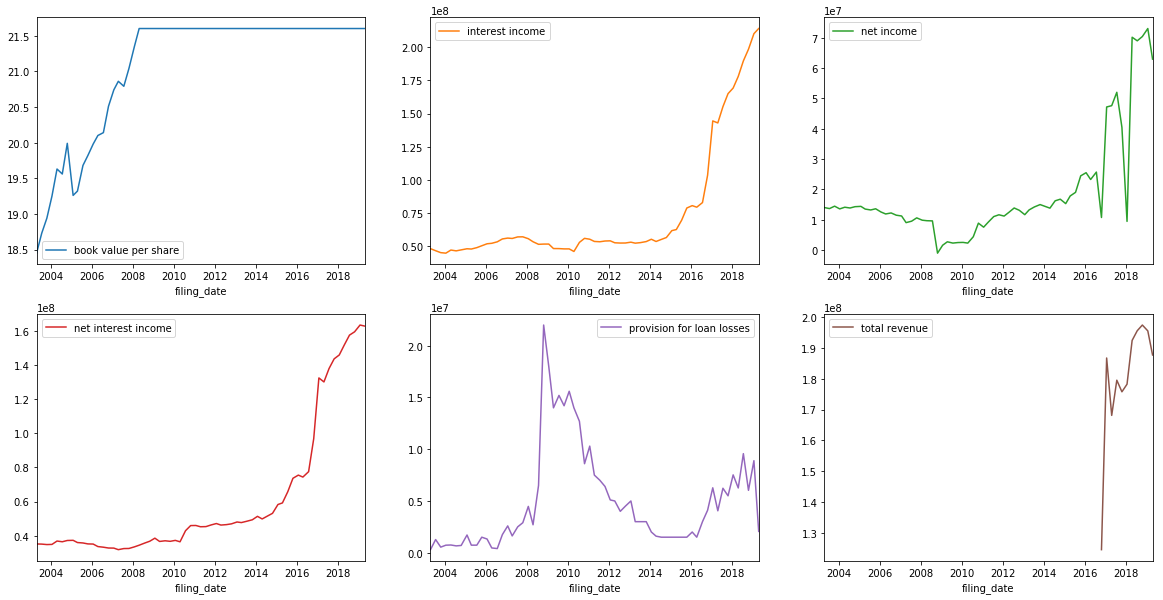

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                          
0000019612 book value per share  2008Q2 to 2019Q1: 44 periods  missing   
           total revenue         2003Q1 to 2016Q2: 54 periods  missing   

                                        message  
cik        item                                  
0000019612 book value per share  Missing period  
           total revenue         Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()